In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [30]:
d2 = pd.read_csv('WE_2019_11_09.csv')

In [31]:
d2.columns

Index(['time', 'energy', 'current', 'voltage', 'power_real', 'power_apparent',
       'power_factor', 'wifi', 'timestamp', 'device', 'pid', 'channel',
       'version', 'threephasechannel'],
      dtype='object')

In [32]:
d2.head()

,time,energy,current,voltage,power_real,power_apparent,power_factor,wifi,timestamp,device,pid,channel,version,threephasechannel
0,1573257601,2762570800,1828,236708.0,410.0,432,949.0,-68.0,1573257601,WE,4d0032000851353532343835,1,1,NaN
1,1573257602,2762570915,1842,236745.0,414.0,436,949.0,-68.0,1573257602,WE,4d0032000851353532343835,1,1,NaN
2,1573257603,2762571029,1833,236652.0,410.0,433,946.0,-68.0,1573257603,WE,4d0032000851353532343835,1,1,NaN
3,1573257604,2762571143,1830,236430.0,410.0,432,949.0,-69.0,1573257604,WE,4d0032000851353532343835,1,1,NaN
4,1573257605,2762571257,1840,236190.0,410.0,434,944.0,-68.0,1573257605,WE,4d0032000851353532343835,1,1,NaN


In [33]:
print("No of unique devices:",d2['device'].unique())


No of unique devices: ['WE']


In [34]:
print('No of Channels:' ,d2['channel'].unique())

No of Channels: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]


In [35]:
d2=d2.drop(['wifi','threephasechannel','pid'],axis=1)

In [36]:
d2['voltage'].fillna((d2['voltage'].mean()),inplace=True)
d2['power_real'].fillna((d2['power_real'].mean()),inplace=True)
d2['power_factor'].fillna((d2['power_factor'].mean()),inplace=True)




In [37]:
d2['device']= d2['device'].map({'WE':1})
d2['device'].fillna(0,inplace=True)

In [38]:
d2['voltage'].value_counts()

232690.397235    790539
232626.000000        79
231949.000000        77
232047.000000        77
232786.000000        76
                  ...  
228676.000000         1
237595.000000         1
237588.000000         1
237581.000000         1
239284.000000         1
Name: voltage, Length: 10639, dtype: int64

In [39]:
d2['power_factor']

0          949.0
1          949.0
2          946.0
3          949.0
4          944.0
           ...  
1048570   -298.0
1048571   -297.0
1048572   -297.0
1048573   -297.0
1048574   -297.0
Name: power_factor, Length: 1048575, dtype: float64

In [40]:
d2.isnull().sum()

time              0
energy            0
current           0
voltage           0
power_real        0
power_apparent    0
power_factor      0
timestamp         0
device            0
channel           0
version           0
dtype: int64

Text(0.5, 1.0, 'current vs voltage')

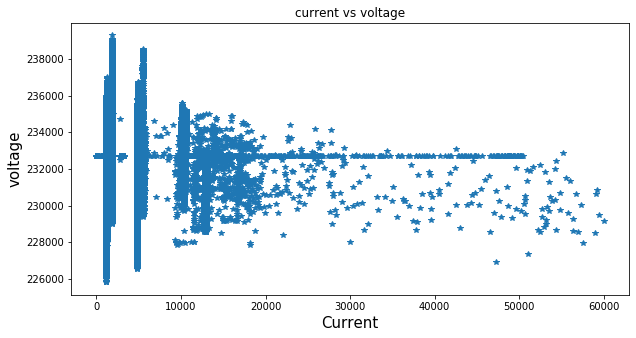

In [41]:
plt.figure(figsize=(10,5))
plt.plot(d2['current'],d2['voltage'],'*')
plt.xlabel('Current',fontsize=15)
plt.ylabel('voltage',fontsize=15)
plt.title('current vs voltage')

Text(0.5, 1.0, 'Energy Variation')

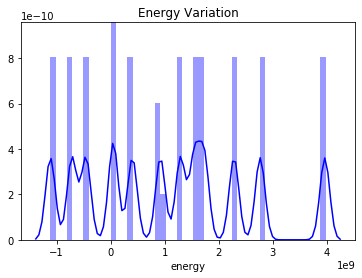

In [42]:
sns.distplot(d2['energy'],color='blue')
plt.title('Energy Variation')

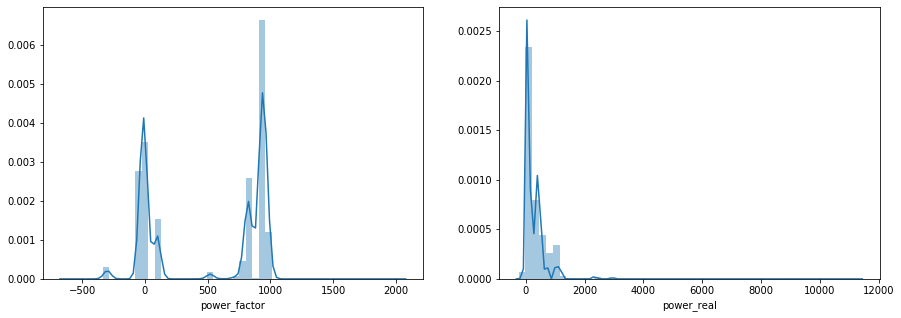

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(d2['power_factor'])

plt.subplot(1,2,2)
sns.distplot(d2['power_real'])

In [44]:
X=d2

In [45]:
from sklearn.cluster import KMeans
from sklearn import cluster


In [46]:
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
labels=model.predict(X)
print(labels)

[1 1 1 ... 0 0 0]


In [48]:
centroids = model.cluster_centers_
print(centroids)

[[ 1.57329967e+09 -1.47567705e+08  9.99511468e+02  2.32690397e+05
   1.51135106e+02  2.33504701e+02  4.27186954e+02  1.57329967e+09
   1.00000000e+00  9.60799657e+00  1.00000000e+00]
 [ 1.57330075e+09  2.26620779e+09  2.46123088e+03  2.32690397e+05
   4.48233461e+02  5.75336193e+02  6.15629670e+02  1.57330075e+09
   1.00000000e+00  3.50000000e+00  1.00000000e+00]]
